In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('C:\\Users\\Admin\\Desktop\Anu_shri\\senti_donald.csv',encoding = 'ISO-8859-1')

In [3]:
data.head()

,tweets
0,2019-10-23 03:30:07 RT @ericgarland: America i...
1,America must getâ¦
2,2019-10-23 03:30:06 RT @MotherJones: Sen. Amy ...
3,"2019-10-23 03:30:06 RT @LanaDelReyFans: ""I use..."
4,2019-10-23 03:30:06 RT @andy_arcamax: Trump sa...


In [4]:
# Feature Extraction
# Number of words

data['word_count'] = data['tweets'].apply(lambda x: len(str(x).split(" ")))
data[['tweets','word_count']].head()

,tweets,word_count
0,2019-10-23 03:30:07 RT @ericgarland: America i...,22
1,America must getâ¦,3
2,2019-10-23 03:30:06 RT @MotherJones: Sen. Amy ...,21
3,"2019-10-23 03:30:06 RT @LanaDelReyFans: ""I use...",18
4,2019-10-23 03:30:06 RT @andy_arcamax: Trump sa...,24


In [5]:
# Number of characters

data['char_count'] = data['tweets'].str.len() ## this also includes spaces
data[['tweets','char_count']].head()

,tweets,char_count
0,2019-10-23 03:30:07 RT @ericgarland: America i...,141
1,America must getâ¦,19
2,2019-10-23 03:30:06 RT @MotherJones: Sen. Amy ...,162
3,"2019-10-23 03:30:06 RT @LanaDelReyFans: ""I use...",133
4,2019-10-23 03:30:06 RT @andy_arcamax: Trump sa...,162


In [6]:
# Average word length

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['tweets'].apply(lambda x: avg_word(x))
data[['tweets','avg_word']].head()

,tweets,avg_word
0,2019-10-23 03:30:07 RT @ericgarland: America i...,5.454545
1,America must getâ¦,5.666667
2,2019-10-23 03:30:06 RT @MotherJones: Sen. Amy ...,6.761905
3,"2019-10-23 03:30:06 RT @LanaDelReyFans: ""I use...",6.444444
4,2019-10-23 03:30:06 RT @andy_arcamax: Trump sa...,5.791667


In [7]:
# Number of stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['tweets'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['tweets','stopwords']].head()

,tweets,stopwords
0,2019-10-23 03:30:07 RT @ericgarland: America i...,7
1,America must getâ¦,0
2,2019-10-23 03:30:06 RT @MotherJones: Sen. Amy ...,5
3,"2019-10-23 03:30:06 RT @LanaDelReyFans: ""I use...",1
4,2019-10-23 03:30:06 RT @andy_arcamax: Trump sa...,7


In [8]:
# number of special characters

data['hastags'] = data['tweets'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['tweets','hastags']].head()

,tweets,hastags
0,2019-10-23 03:30:07 RT @ericgarland: America i...,0
1,America must getâ¦,0
2,2019-10-23 03:30:06 RT @MotherJones: Sen. Amy ...,0
3,"2019-10-23 03:30:06 RT @LanaDelReyFans: ""I use...",0
4,2019-10-23 03:30:06 RT @andy_arcamax: Trump sa...,0


In [9]:
# number of numerics

data['numerics'] = data['tweets'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['tweets','numerics']].head()

,tweets,numerics
0,2019-10-23 03:30:07 RT @ericgarland: America i...,0
1,America must getâ¦,0
2,2019-10-23 03:30:06 RT @MotherJones: Sen. Amy ...,0
3,"2019-10-23 03:30:06 RT @LanaDelReyFans: ""I use...",0
4,2019-10-23 03:30:06 RT @andy_arcamax: Trump sa...,0


In [10]:
# number of uppercase words

data['upper'] = data['tweets'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['tweets','upper']].head()


,tweets,upper
0,2019-10-23 03:30:07 RT @ericgarland: America i...,1
1,America must getâ¦,0
2,2019-10-23 03:30:06 RT @MotherJones: Sen. Amy ...,1
3,"2019-10-23 03:30:06 RT @LanaDelReyFans: ""I use...",3
4,2019-10-23 03:30:06 RT @andy_arcamax: Trump sa...,1


In [11]:
# Pre processing
# Lower case

data['tweets'] = data['tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['tweets'].head()

0    2019-10-23 03:30:07 rt @ericgarland: america i...
1                                  america must getâ¦
2    2019-10-23 03:30:06 rt @motherjones: sen. amy ...
3    2019-10-23 03:30:06 rt @lanadelreyfans: "i use...
4    2019-10-23 03:30:06 rt @andy_arcamax: trump sa...
Name: tweets, dtype: object

In [12]:
# removing punctuations

data['tweets'] = data['tweets'].str.replace('[^\w\s]','')
#data['tweets'] = data['tweets'].str.replace('[http://t.co/]','')
#data['tweets'] = data['tweets'].str.replace('[a-zA-Z0-9]','')

data['tweets'].head()

0    20191023 033007 rt ericgarland america is not ...
1                                    america must getâ
2    20191023 033006 rt motherjones sen amy klobuch...
3    20191023 033006 rt lanadelreyfans i used witch...
4    20191023 033006 rt andy_arcamax trump says the...
Name: tweets, dtype: object

In [13]:
# Removal of stop words


from nltk.corpus import stopwords
stop = stopwords.words('english')
data['tweets'] = data['tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['tweets'].head()


0    20191023 033007 rt ericgarland america charged...
1                                    america must getâ
2    20191023 033006 rt motherjones sen amy klobuch...
3    20191023 033006 rt lanadelreyfans used witchcr...
4    20191023 033006 rt andy_arcamax trump says imp...
Name: tweets, dtype: object

In [14]:
# Common word removal

freq = pd.Series(' '.join(data['tweets']).split()).value_counts()[:10]
freq

20191023       189
rt             170
donald         122
trump          112
know            30
president       26
trumps          24
trumpâs         24
bill            21
impeachment     18
dtype: int64

In [15]:
freq = list(freq.index)
data['tweets'] = data['tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['tweets'].head()

0    033007 ericgarland america charged impeaching ...
1                                    america must getâ
2    033006 motherjones sen amy klobuchar released ...
3    033006 lanadelreyfans used witchcraft still â ...
4    033006 andy_arcamax says inquiry conducted unf...
Name: tweets, dtype: object

In [16]:
# spelling correction

from textblob import TextBlob
data['tweets'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    033007 ericgarland america charged impeaching ...
1                                     america must get
2    033006 motherjones men amy klobuchar released ...
3    033006 lanadelreyfans used witchcraft still â ...
4    033006 andy_arcamax says inquiry conducted unf...
Name: tweets, dtype: object

In [17]:
# Tokenization

from nltk import tokenize
from textblob import TextBlob


In [18]:
TextBlob(data['tweets'][1]).words


WordList(['america', 'must', 'getâ'])

In [19]:
# Stemming

from nltk.stem import PorterStemmer
st = PorterStemmer()
data['tweets'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    033007 ericgarland america charg impeach much ...
1                                    america must getâ
2    033006 motherjon sen ami klobuchar releas evid...
3    033006 lanadelreyfan use witchcraft still â la...
4    033006 andy_arcamax say inquiri conduct unfair...
Name: tweets, dtype: object

In [20]:
# Lemmatization


import nltk
from textblob import Word
nltk.download('wordnet')
data['tweets'] = data['tweets'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['tweets'].head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    033007 ericgarland america charged impeaching ...
1                                    america must getâ
2    033006 motherjones sen amy klobuchar released ...
3    033006 lanadelreyfans used witchcraft still â ...
4    033006 andy_arcamax say inquiry conducted unfa...
Name: tweets, dtype: object

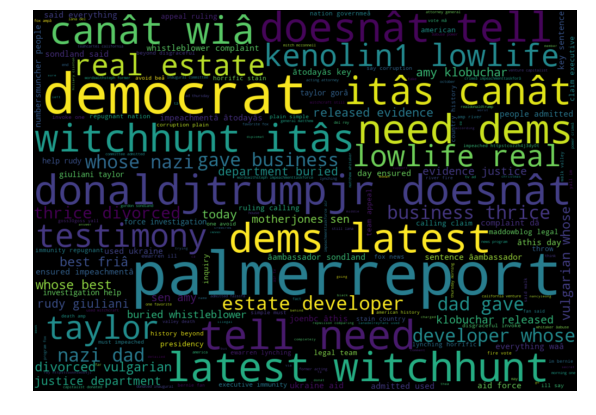

In [22]:
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in data['tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=700, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
# Advance text processing
# N-grams
TextBlob(data['tweets'][0]).ngrams(2)

[WordList(['033007', 'ericgarland']),
 WordList(['ericgarland', 'america']),
 WordList(['america', 'charged']),
 WordList(['charged', 'impeaching']),
 WordList(['impeaching', 'much']),
 WordList(['much', 'far']),
 WordList(['far', 'beyond']),
 WordList(['beyond', 'obvious'])]

In [24]:
#Term frequency

tf1 = (data['tweets'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,must,1
1,getâ,1
2,america,1


In [25]:
# Inverse document frequency

import numpy as np
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['tweets'].str.contains(word)])))

tf1


,words,tf,idf
0,must,1,3.795489
1,getâ,1,5.587249
2,america,1,2.879198


In [26]:
# TF-IDF
# multiplication of TF and IDF

tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,must,1,3.795489,3.795489
1,getâ,1,5.587249,5.587249
2,america,1,2.879198,2.879198


In [27]:
# Bag of words

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['tweets'])
data_bow

<267x888 sparse matrix of type '<class 'numpy.int64'>'
	with 2257 stored elements in Compressed Sparse Row format>

In [28]:
# sentiment analysis

data['tweets'][:5].apply(lambda x: TextBlob(x).sentiment)

0    (0.05, 0.75)
1      (0.0, 0.0)
2     (-0.3, 0.2)
3      (0.0, 0.0)
4     (-0.4, 0.7)
Name: tweets, dtype: object

In [29]:
data['sentiment'] = data['tweets'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['tweets','sentiment']].head()


,tweets,sentiment
0,033007 ericgarland america charged impeaching ...,0.05
1,america must getâ,0.00
2,033006 motherjones sen amy klobuchar released ...,-0.30
3,033006 lanadelreyfans used witchcraft still â ...,0.00
4,033006 andy_arcamax say inquiry conducted unfa...,-0.40


In [30]:
data['sentiment'].head()

0    0.05
1    0.00
2   -0.30
3    0.00
4   -0.40
Name: sentiment, dtype: float64

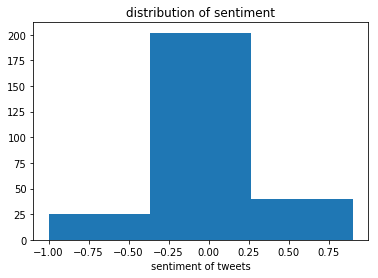

In [31]:
import matplotlib.pyplot as plt
plt.hist(data.sentiment,bins=3,align='mid')

plt.xlabel('sentiment of tweets')
plt.title('distribution of sentiment')
plt.show()

In [32]:
# EDA

# normal function example
def my_normal_function(x):
    return x**2 + 10
# lambda function example
my_lambda_function = lambda x: x**2 + 10


In [33]:
# make a new column to highlight retweets
data['is_retweet'] = data['tweets'].apply(lambda x: x[:2]=='RT')
data['is_retweet'].sum()  # number of retweets

0

In [34]:
# number of unique retweets
data.loc[data['is_retweet']].tweets.unique().size

0

In [35]:
# 10 most repeated tweets
data.groupby(['tweets']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,tweets,counts
228,âtodayâs key sentence âambassador sondland sai...,6
215,rudy giuliani,6
204,gorâ,6
218,taylor,6
216,said walk valley death amp river fire vote mâ,5
208,impeachmenttaskforâ,4
227,âabuse power crimeâ,4
210,itâs stunning witnessâ,3
194,american never would known dirty democrat,2
203,fucked,2


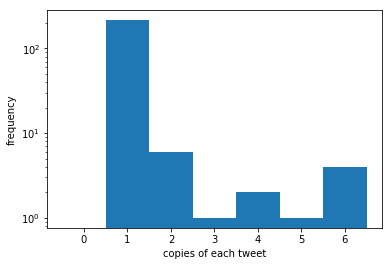

In [36]:
# number of times each tweet appears
counts = data.groupby(['tweets']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [37]:
def find_retweeted(tweets):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweets)

def find_mentioned(tweets):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweets)  

def find_hashtags(tweets):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweets) 

In [40]:
# two sample tweets
my_tweet = 'RT @our_codingclub: Can @you find #all the #hashtags?'
my_other_tweet = 'Not a retweet. All views @my own'

In [41]:
# make new columns for retweeted usernames, mentioned usernames and hashtags


import re
data['retweeted'] = data.tweets.apply(find_retweeted)
data['mentioned'] = data.tweets.apply(find_mentioned)
data['hashtags'] = data.tweets.apply(find_hashtags)

In [42]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = data.loc[
                       data.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]


In [43]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [44]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

0

In [45]:
# cleaning unsructured text data


import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [46]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [47]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [48]:
data['clean_tweet'] = data.tweets.apply(clean_tweet)

In [49]:
# Applying topic modelling


from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=1.0, min_df=1, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(data['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [50]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [51]:
model.fit(tf)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [52]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [53]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,ukrain,5.3,whose,26.3,lynch,16.7,still,11.2,say,13.7,rule,12.3,former,12.4,taylor,17.8,impeach,11.7,rudi,4.7
1,forc,4.8,busi,13.8,latest,15.7,use,11.2,democrat,13.6,nation,11.8,would,11.2,said,16.4,clear,10.5,giulia,4.1
2,peopl,4.8,real,13.7,need,15.6,â,10.6,inquiri,11.2,appeal,11.1,crewcrew,9.9,sondland,14.6,katyal,10.5,fuck,2.7
3,admit,4.6,lowlif,13.2,b,15.5,rey,10.6,hous,10.4,immun,11.1,miller,9.3,whistleblow,13.8,case,10.5,usa,1.5
4,aid,4.1,dad,13.2,doesnât,15.0,lana,10.6,push,9.2,governmeâ,11.1,close,9.3,evid,13.8,neal,10.5,take,1.4
5,investig,4.1,kenolin,13.2,one,15.0,witchcraft,10.6,arcamax,9.2,claim,11.1,contact,9.3,justic,12.5,book,10.5,go,1.4
6,numbersmunch,4.1,develop,13.2,donaldjtrumpjr,15.0,del,10.6,conduct,9.2,legal,11.1,accord,9.3,ami,12.5,get,10.4,spi,1.4
7,use,4.1,thrice,13.2,canât,15.0,lanadelreyfan,9.9,hide,9.2,repugn,11.1,va,9.3,buri,12.5,behind,9.8,presidentelect,0.8
8,help,4.1,vulgarian,13.2,itâ,15.0,palmerreport,5.4,fâ,9.2,team,11.1,secretari,9.3,depart,12.5,written,9.8,actbrigitt,0.8
9,tri,1.4,best,13.2,tell,15.0,today,2.8,fact,9.2,maddowblog,11.1,stephen,9.3,releas,12.5,short,9.8,like,0.8
